In [3]:
%matplotlib inline
import numpy as np
from functools import reduce
from math import log
import itertools
zero_qubit=np.matrix('1; 0')
one_qubit=np.matrix('0; 1')
plus_qubit=1/np.sqrt(2)*np.matrix('1; 1')
minus_qubit=1/np.sqrt(2)*np.matrix('1; -1')
clockwisearrow_qubit=1/np.sqrt(2)*np.matrix([[1],[np.complex(0,1)]])    
counterclockwisearrow_qubit=1/np.sqrt(2)*np.matrix([[1],[-np.complex(0,1)]])

def zero_to_one_qubit(percentage_zero,percentage_one):
     if not percentage_zero+percentage_one==100 or percentage_zero<0 or percentage_one<0: raise Exception("percentages must add up to 100\% and both be positive ")
     return np.sqrt(percentage_zero/100.)*zero_qubit+np.sqrt(percentage_one/100.)*one_qubit
def create_quantum_state(qubits):
    return reduce(lambda x,y:np.kron(x,y),qubits)
register_01=create_quantum_state([zero_qubit,one_qubit])

def get_nqubits_quantum_state(state):
    return int(log(state.size,2))
def get_qubits_from_state(state):
    basis_states=[zero_qubit,one_qubit,plus_qubit,minus_qubit,clockwisearrow_qubit,counterclockwisearrow_qubit]
    for separated_state in itertools.product(basis_states, repeat=get_nqubits_quantum_state(state)):
        candidate_state=create_quantum_state(separated_state)
        if np.allclose(candidate_state,state):
            return separated_state
def measure_in_01_basis(state):
    from random import random
    n_qubits=int(log(state.shape[0],2))
    probabilities=[(coeff*coeff.conjugate()).real for coeff in state.flat]
    rand=random()
    for idx,state_desc in enumerate([''.join(map(str,state_desc)) for state_desc in itertools.product([0, 1], repeat=n_qubits)]):
        if rand < sum(probabilities[0:(idx+1)]):
            return '|"%s">' % state_desc
        
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def get_bloch_coordinates(qubit):
    def get_x_bloch(qubit):
        qubit_x_basis=1./np.sqrt(2)*np.matrix('1 1; 1 -1')*qubit 
        prob_zero_qubit=(qubit_x_basis.item(0)*qubit_x_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_x_basis.item(1)*qubit_x_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit

    def get_y_bloch(qubit):
        qubit_y_basis=1./np.sqrt(2)*np.matrix('1 1; 1 -1')*np.matrix([[1,0],[0,-np.complex(0,1)]])*qubit
        prob_zero_qubit=(qubit_y_basis.item(0)*qubit_y_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_y_basis.item(1)*qubit_y_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit

    def get_z_bloch(qubit):
        qubit_z_basis=qubit
        prob_zero_qubit=(qubit_z_basis.item(0)*qubit_z_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_z_basis.item(1)*qubit_z_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit
    return (get_x_bloch(qubit),get_y_bloch(qubit),get_z_bloch(qubit))

def plot_bloch(qubit,color='b',ax=None):
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        # draw sphere
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        ax.plot_wireframe(x, y, z, color="k",alpha=.1)
        ax.grid(False)

    coordinates=get_bloch_coordinates(qubit)
    ax.quiver([0],[0],[0],[coordinates[0]],[coordinates[1]],[coordinates[2]],length=1,color=color,arrow_length_ratio=0.3)
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_xlabel('x: |"-"> to |"+">')
    ax.set_ylabel('y: |"↺"> to |"↻">')
    ax.set_zlabel('z: |"1"> to |"0">')
    ax.view_init(azim=20)
    return ax


In [ ]:
Q1 
Since on the book it says an NAND gate is universal, then my job is to 
find a set of gates that can simulate NAND other other than NOT and AND. My answer is: NOT and OR.

Q2 
Here is the reason from python response: shapes (2,1) and (2,2) not aligned: 1 (dim 1) != 2 (dim 0)

Q3 
IIII|"0"> = |"0"> 
I|"+"> = |"+">

visualization of X*H*zero_qubit
using one_qubit to get same result


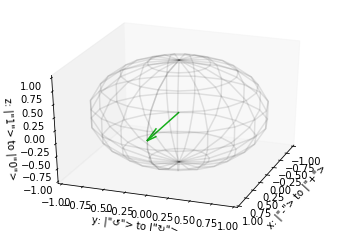

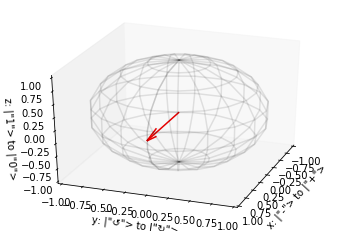

In [40]:
#Q4
#definitions of some gates given in book
identity_gate=np.eye(2,2)
i_=np.complex(0,1)
H=1./np.sqrt(2)*np.matrix('1 1; 1 -1') 
X=np.matrix('0 1; 1 0')
Y=np.matrix([[0, -i_],[i_, 0]])
Z=np.matrix([[1,0],[0,-1]])
S=np.matrix([[1,0],[0,np.e**(i_*np.pi/2.)]])
T=np.matrix([[1,0],[0, np.e**(i_*np.pi/4.)]])
Sdagger = S.conjugate().transpose()
Tdagger= T.conjugate().transpose()

print("visualization of X*H*zero_qubit")
qub = X*H*zero_qubit
plot_bloch(qub,'xkcd:green')

#apply Y and H gate on |"1"> to get same result
print("using one_qubit to get same result")
plot_bloch(Y*H*one_qubit,'xkcd:red')


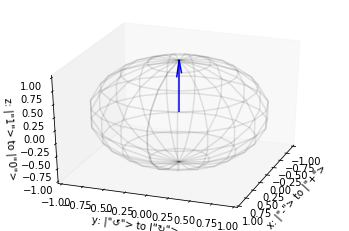

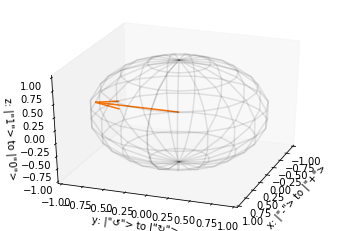

In [57]:
#Q5
#Use H to get zero_qubit
plot_bloch(H*plus_qubit)

#Use H and Z gates to get counter clock wise qubit
plot_bloch(S*Z*plus_qubit,'xkcd:orange')

In [ ]:
#Q6
#Identity gate. 
#2 conditions: if qubit is on the x(y) axis. if on,qubit would not change because it's on rotating axis
#if not on, 2 rotations: 2*180 = 360 degrees. it goes back to the original place.

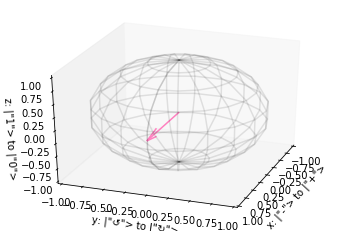

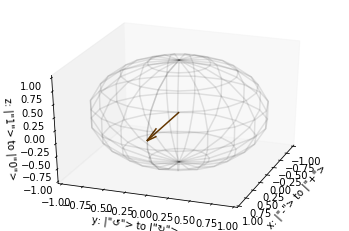

In [67]:
#7. What is SS†|"+">? What is TT†|"+">?
plot_bloch(S*Sdagger*plus_qubit,'xkcd:pink')
plot_bloch(T*Tdagger*plus_qubit,'xkcd:brown')

In [73]:
#code from book
def probability_table_in_01_basis(state,n_measurements=1000):
    from collections import Counter
    measured=[measure_in_01_basis(state) for i in range(n_measurements)]
    for s,c in Counter(measured).items():
        print(s,"{0:.0%}".format(c/n_measurements))

CNOT=np.matrix('1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0')
state = CNOT*create_quantum_state([plus_qubit,plus_qubit])
print(state)
probability_table_in_01_basis(state)

[[0.5]
 [0.5]
 [0.5]
 [0.5]]
|"10"> 26%
|"01"> 26%
|"00"> 23%
|"11"> 24%
